In [8]:
import pyglet.gl as gl
import numpy as np
import pyrealsense2 as rs
import open3d as o3d
import matplotlib.pyplot as plt 
import thread

In [9]:
class PointObject:
    def __init__(self, point_cloud,depth,rgb,timestamp):
        self.point_cloud = point_cloud
        self.depth = depth
        self.rgb = rgb
        self.timestamp = timestamp


In [15]:
def depth_cam_collection():
    point_cloud_list = []

    # Declare pointcloud object, for calculating pointclouds and texture mappings
    pc = rs.pointcloud()
    # We want the points object to be persistent so we can display the last cloud when a frame drops
    points = rs.points()

    # Declare RealSense pipeline, encapsulating the actual device and sensors
    pipe = rs.pipeline()
    config = rs.config()

    # Enable depth and colour stream
    config.enable_stream(rs.stream.depth)
    config.enable_stream(rs.stream.color)

    # Start streaming with chosen configuration
    pipe.start(config)

    # We'll use the colorizer to generate texture for our PLY
    # (alternatively, texture can be obtained from color or infrared stream)
    colorizer = rs.colorizer()

    try:
        # Skip 5 first frames to give the Auto-Exposure time to adjust
        for x in range(5):
            pipe.wait_for_frames()

        while True:
            # Wait for the next set of frames from the camera
            frames = pipe.wait_for_frames()
            colorized = colorizer.process(frames)

            # Check the colour image
            color_frame = frames.get_color_frame()
            depth_frame = frames.get_depth_frame()
            time_stamp = frames.get_timestamp()
            print(time_stamp)
            
            color = np.asanyarray(color_frame.get_data())
            depth = np.asanyarray(depth_frame.get_data())

            # fig, (ax1, ax2) = plt.subplots(1, 2)
            # fig.suptitle('Horizontally stacked subplots')
            # ax1.imshow(color)
            # ax2.imshow(depth)

            # Create save_to_ply object
            ply = rs.save_to_ply("1.ply")

            # Set options to the desired values
            # In this example we'll generate a textual PLY with normals (mesh is already created by default)
            ply.set_option(rs.save_to_ply.option_ply_binary, False)
            ply.set_option(rs.save_to_ply.option_ply_normals, True)

            print("Saving to 1.ply...")
            # Apply the processing block to the frameset which contains the depth frame and the texture
            ply.process(colorized)
            print("Done")
            pcd = o3d.io.read_point_cloud("1.ply") # Load saved pointcloud

            point_cloud_data  = np.asarray(pcd.points) # Picke error need to be checked

            point_object = PointObject(point_cloud_data,depth,color,time_stamp)
            point_cloud_list.append(point_object)
        
    finally:
        pipe.stop()
    arr = numpy.asarray(point_cloud_list)

1627441180807.6194
Saving to 1.ply...
Done
1627441185198.1833
Saving to 1.ply...
Done
1627441190017.48
Saving to 1.ply...
Done
1627441195321.3286
Saving to 1.ply...
Done
1627441200458.3938
Saving to 1.ply...
Done
1627441205395.2034
Saving to 1.ply...
Done
1627441210404.151
Saving to 1.ply...
Done
1627441216738.487
Saving to 1.ply...
Done
1627441221772.6743
Saving to 1.ply...
Done
1627441226710.5994
Saving to 1.ply...
Done
1627441232314.6055
Saving to 1.ply...
Done
1627441238585.8123
Saving to 1.ply...
Done
1627441243989.7317
Saving to 1.ply...
Done
1627441250260.899
Saving to 1.ply...
Done
1627441255798.2117
Saving to 1.ply...
Done
1627441255831.5693
Saving to 1.ply...
Done


RuntimeError: Frame didn't arrive within 5000

In [18]:
point_cloud_1 = point_cloud_list[10].point_cloud

In [19]:
o3d.visualization.draw_geometries([point_cloud_1])

In [ ]:
pcd = o3d.io.read_point_cloud("1.ply") # Load saved pointcloud

# downpcd = pcd.voxel_down_sample(voxel_size=0.05)
# o3d.visualization.draw_geometries([downpcd])

print(np.asarray(pcd.points))
o3d.visualization.draw_geometries([pcd])

[[-1.86211    1.17251   -2.034    ]
 [-1.86284    1.17597   -2.04     ]
 [-1.85261    1.17251   -2.034    ]
 ...
 [-0.09839   -0.142478  -0.265    ]
 [-0.097771  -0.142478  -0.265    ]
 [-0.0971521 -0.142478  -0.265    ]]


In [ ]:
frame = np.asarray(pcd.points)

In [ ]:
frame.shape

(344416, 3)

In [ ]:
import cv2                                # state of the art computer vision algorithms library
import numpy as np                        # fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
from pyntcloud import PyntCloud # open source library for 3D pointcloud visualisation
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
print("Environment Ready")

Environment Ready


In [ ]:
# Setup:
pipe = rs.pipeline()
cfg = rs.config()
profile = pipe.start(cfg)

# Skip 5 first frames to give the Auto-Exposure time to adjust
for x in range(5):
  pipe.wait_for_frames()
  
# Store next frameset for later processing:
frameset = pipe.wait_for_frames()
color_frame = frameset.get_color_frame()
depth_frame = frameset.get_depth_frame()

# Cleanup:
pipe.stop()
print("Frames Captured")

Frames Captured


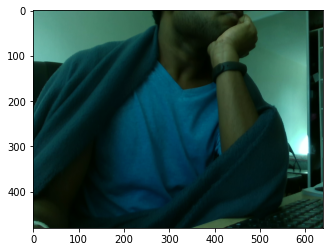

In [ ]:
color = np.asanyarray(color_frame.get_data())
plt.rcParams["axes.grid"] = False
plt.imshow(color)

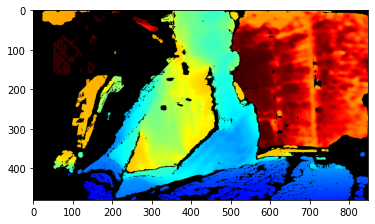

In [ ]:
colorizer = rs.colorizer()
colorized_depth = np.asanyarray(colorizer.colorize(depth_frame).get_data())
plt.imshow(colorized_depth)

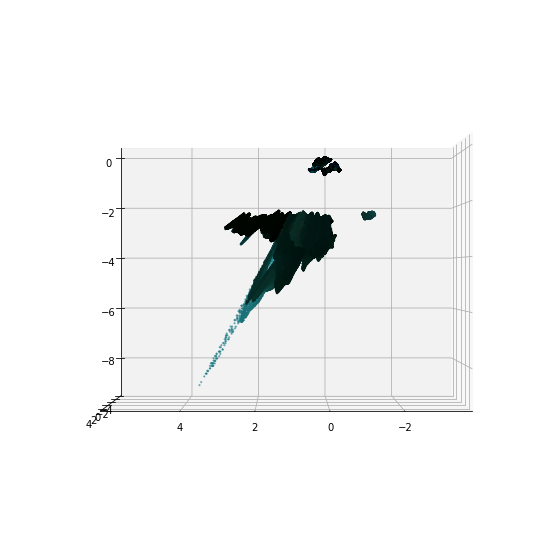

In [ ]:
pc = rs.pointcloud();
pc.map_to(color_frame);
pointcloud = pc.calculate(depth_frame);
pointcloud.export_to_ply("1.ply", color_frame)
cloud = PyntCloud.from_file("1.ply");
cloud.plot()

In [ ]:
print(cloud)

PyntCloud
243885 points with 3 scalar fields
453242 faces in mesh
0 kdtrees
0 voxelgrids
Centroid: 0.7423040270805359, 0.22677437961101532, -1.492403268814087
Other attributes:
	 comments: <class 'list'>



In [ ]:
cloud.points.describe()

,x,y,z,red,green,blue
count,243885.000000,243885.000000,243885.000000,243885.000000,243885.000000,243885.000000
mean,0.742304,0.226774,-1.492403,21.825446,53.513865,45.772602
std,0.958728,0.521368,1.236050,26.951470,40.436510,40.034324
min,-1.676254,-0.829721,-5.743001,0.000000,3.000000,0.000000
25%,-0.022940,-0.130348,-2.812000,2.000000,24.000000,12.000000
50%,0.142561,0.009976,-0.569000,12.000000,42.000000,35.000000
75%,1.596248,0.421387,-0.461000,28.000000,72.000000,69.000000
max,3.126135,2.012943,-0.184000,250.000000,255.000000,255.000000
